
## PROJECT TITLE: Optimized Product Recommendation for Enhanced User Experience on Amazon

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
data = pd.read_csv('/Users/sivapriya/Downloads/Home_and_Kitchen.csv')

In [5]:
data.columns = ['userId', 'productId', 'Rating', 'Timestamp']

In [6]:
data.head(5)

,userId,productId,Rating,Timestamp
0,0006564224,A2AMX0AJ2BUDNV,5.0,1270166400
1,0560467893,A8LUWTIPU9CZB,5.0,1446681600
2,0560467893,AABKIIHAL0L66,4.0,1446076800
3,0560467893,A3DA0KIQ5OBK5C,3.0,1441756800
4,0560467893,A32IGEYSCMEMOD,1.0,1440288000


In [7]:
data.tail(1)

,userId,productId,Rating,Timestamp
21928566,B01HJHTC6O,ADNZ2NWXVKB1L,5.0,1438560000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21928567 entries, 0 to 21928566
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 669.2+ MB


In [9]:
data.describe()

,Rating,Timestamp
count,2.192857e+07,2.192857e+07
mean,4.194894e+00,1.449456e+09
std,1.306882e+00,6.177466e+07
min,1.000000e+00,9.431424e+08
25%,4.000000e+00,1.420416e+09
50%,5.000000e+00,1.460678e+09
75%,5.000000e+00,1.491696e+09
max,5.000000e+00,1.538698e+09


In [10]:
data = data.drop_duplicates()
data = data.drop_duplicates(subset=['userId', 'productId'])

In [11]:
data.tail(1)

,userId,productId,Rating,Timestamp
21928566,B01HJHTC6O,ADNZ2NWXVKB1L,5.0,1438560000


In [12]:
data['Readable Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data = data.drop(columns=['Readable Timestamp'])
data.head()

,userId,productId,Rating,Timestamp
0,0006564224,A2AMX0AJ2BUDNV,5.0,2010-04-02
1,0560467893,A8LUWTIPU9CZB,5.0,2015-11-05
2,0560467893,AABKIIHAL0L66,4.0,2015-10-29
3,0560467893,A3DA0KIQ5OBK5C,3.0,2015-09-09
4,0560467893,A32IGEYSCMEMOD,1.0,2015-08-23


In [13]:
num_users = data['userId'].nunique()
num_items = data['productId'].nunique()
print(f'Number of unique users: {num_users}')
print(f'Number of unique products: {num_items}')

Number of unique users: 1286050
Number of unique products: 9767605


In [14]:
max_rating = data['Rating'].max()
min_rating = data['Rating'].min()

print(f"Maximum Rating: {max_rating}")
print(f"Minimum Rating: {min_rating}")

Maximum Rating: 5.0
Minimum Rating: 1.0


In [15]:
rating_counts = data['Rating'].value_counts()
rating_counts

Rating
5.0    13795155
4.0     2958452
1.0     1958238
3.0     1579968
2.0     1094508
Name: count, dtype: int64

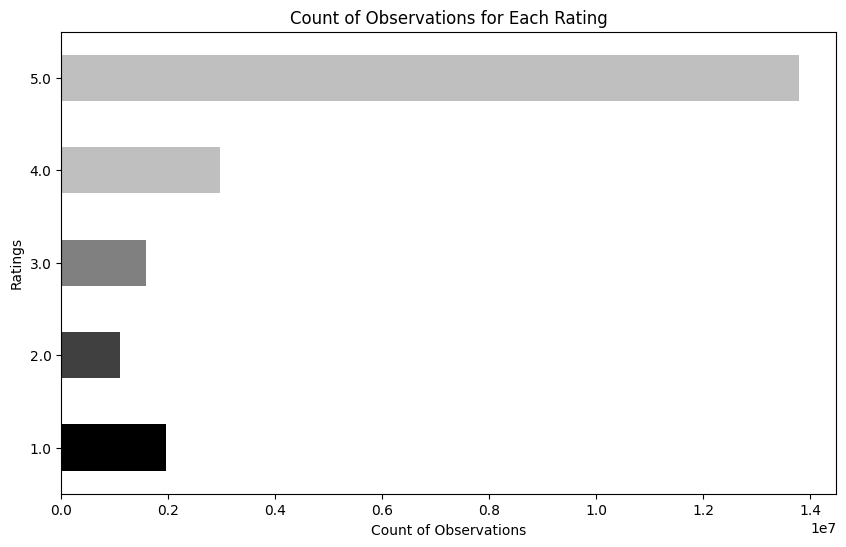

In [16]:
plt.figure(figsize=(10, 6))  
colors = ['#000000', '#404040', '#808080', '#BFBFBF', '#BFBFBF']  
rating_counts.sort_index().plot(kind='barh', color=colors)  
plt.title('Count of Observations for Each Rating')
plt.ylabel('Ratings')
plt.xlabel('Count of Observations')
plt.show()

In [17]:
# 1. Count the number of ratings for each product
ratings_countofu = data.groupby('userId').size()
ratings_count = data.groupby('productId').size()

# 2. Filter out products with less than 70 ratings
popular_productsofu = ratings_countofu[ratings_countofu >= 70].index
popular_products = ratings_count[ratings_count >= 65].index

# 3. Filter the original dataset to keep only rows with these popular products
filtered_data = data[data['productId'].isin(popular_products)]
filtered_data = filtered_data[filtered_data['userId'].isin(popular_productsofu)]

In [18]:
number_users = filtered_data['userId'].nunique()
number_items = filtered_data['productId'].nunique()
print(f'Number of unique users: {number_users}')
print(f'Number of unique products: {number_items}')

Number of unique users: 31274
Number of unique products: 2030


In [19]:
filtered_data.head(5)

,userId,productId,Rating,Timestamp
1168,1935305441,A3ENX1Y48DJQVK,4.0,2012-09-27
1171,1935305441,A2DPYMNI2HCIOI,3.0,2012-07-17
1717,5509356839,A2C27IQUH9N1Z,5.0,2003-10-30
1889,5509356839,A23GFTVIETX7DS,5.0,2002-10-18
2532,710105482X,A1CSFIQ41U5FWY,3.0,2016-05-02


In [20]:
train_data, test_data = train_test_split(filtered_data, test_size=0.4, random_state=42)

In [21]:
print(f"Training data size: {train_data.shape}")
print(f"Test data size: {test_data.shape}")

Training data size: (69535, 4)
Test data size: (46357, 4)


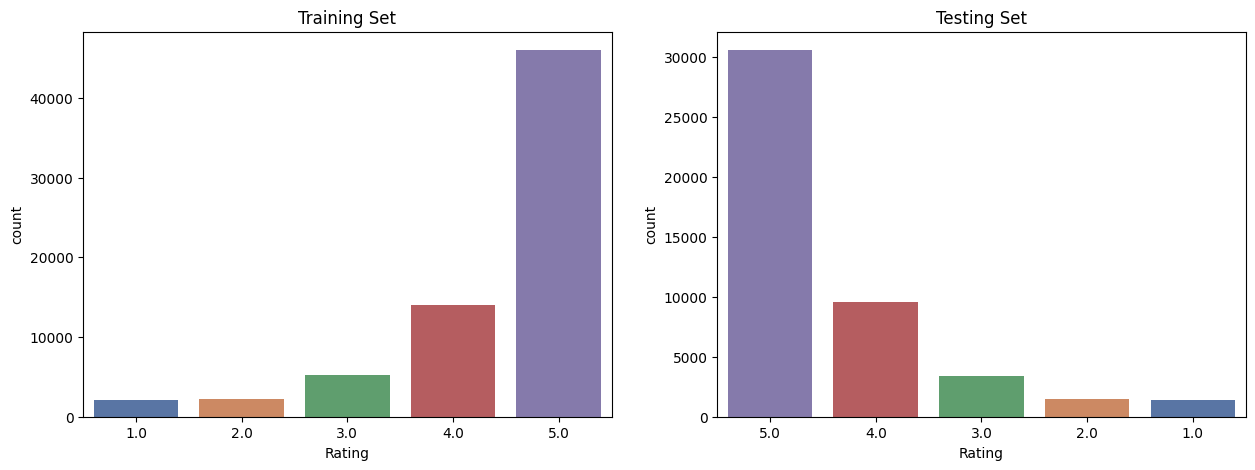

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training Set Plot
sns.countplot(x='Rating', data=train_data, hue='Rating', palette='deep', ax=axes[0], dodge=False)
axes[0].set_title('Training Set')
axes[0].get_legend().remove()  

# Testing Set Plot
sns.countplot(x='Rating', data=test_data, hue='Rating', palette='deep', ax=axes[1], order=test_data['Rating'].value_counts().index, dodge=False)
axes[1].set_title('Testing Set')
axes[1].get_legend().remove()  

plt.show()

In [23]:
product_rating_count = filtered_data.groupby('productId')['Rating'].count().reset_index()
product_rating_count.rename(columns={'Rating': 'TotalRatings'}, inplace=True)
product_rating_count = product_rating_count.sort_values('TotalRatings', ascending=False)

In [24]:
product_avg_rating = filtered_data.groupby('productId')['Rating'].mean().reset_index()
product_avg_rating.rename(columns={'Rating': 'AverageRating'}, inplace=True)
product_avg_rating = product_avg_rating.sort_values('AverageRating', ascending=False)

In [25]:
print("Top Products by Count of Ratings:")
print(product_rating_count.head())

Top Products by Count of Ratings:
           productId  TotalRatings
788   A2GP4EJIAA2OE0           256
407   A1TPW86OHXTXFC           252
1264  A3AZI828WJN1CD           239
557   A23GFTVIETX7DS           232
1094  A2ZY49IDE6TY5I           227


In [26]:
product_popularity = pd.merge(product_avg_rating, product_rating_count, on='productId')

min_ratings_threshold = 50  
filtered_products = product_popularity[product_popularity['TotalRatings'] > min_ratings_threshold]
highest_avg_rating_product = filtered_products.sort_values('AverageRating', ascending=False).head(1)

highest_total_rating_product = product_popularity.sort_values('TotalRatings', ascending=False).head(1)


In [27]:
print("Product with Highest Average Rating (with substantial number of ratings):")
print(highest_avg_rating_product)

print("\nProduct with Highest Total Rating Count:")
print(highest_total_rating_product)

Product with Highest Average Rating (with substantial number of ratings):
       productId  AverageRating  TotalRatings
0  AFXCKN04TF5E6            5.0            55

Product with Highest Total Rating Count:
           productId  AverageRating  TotalRatings
1264  A2GP4EJIAA2OE0       4.386719           256


In [28]:
# 1. Group by productId and sum the ratings
product_popularity_score = filtered_data.groupby('productId')['Rating'].sum().sort_values(ascending=False)
product_popularity_score = product_popularity_score.reset_index()

# 3. Recommend top N products
N = 10  # Number of top products to recommend
top_products = product_popularity_score.head(N)

# Print the top products
print(top_products)

        productId  Rating
0  A2GP4EJIAA2OE0  1123.0
1  A3AZI828WJN1CD  1091.0
2  A1TPW86OHXTXFC  1083.0
3  A1G3ZHC1SU2U82  1035.0
4  A23GFTVIETX7DS  1022.0
5  A25C2M3QF9G7OQ  1020.0
6  A1IU7S4HCK1XK0   992.0
7  A2ZY49IDE6TY5I   973.0
8  A14B4MJ7KZE63B   972.0
9   A4BDCSB1GRKO3   893.0


In [29]:
# User IDs for whom you want to make recommendations
user_ids = ['1935305441', '5509356839']

# Making recommendations for each user
for user_id in user_ids:
    print(f"Recommendations for {user_id}:")
    print(top_products)
    print()  # Just for a newline for better readability

Recommendations for 1935305441:
        productId  Rating
0  A2GP4EJIAA2OE0  1123.0
1  A3AZI828WJN1CD  1091.0
2  A1TPW86OHXTXFC  1083.0
3  A1G3ZHC1SU2U82  1035.0
4  A23GFTVIETX7DS  1022.0
5  A25C2M3QF9G7OQ  1020.0
6  A1IU7S4HCK1XK0   992.0
7  A2ZY49IDE6TY5I   973.0
8  A14B4MJ7KZE63B   972.0
9   A4BDCSB1GRKO3   893.0

Recommendations for 5509356839:
        productId  Rating
0  A2GP4EJIAA2OE0  1123.0
1  A3AZI828WJN1CD  1091.0
2  A1TPW86OHXTXFC  1083.0
3  A1G3ZHC1SU2U82  1035.0
4  A23GFTVIETX7DS  1022.0
5  A25C2M3QF9G7OQ  1020.0
6  A1IU7S4HCK1XK0   992.0
7  A2ZY49IDE6TY5I   973.0
8  A14B4MJ7KZE63B   972.0
9   A4BDCSB1GRKO3   893.0



In [30]:
# Create the User-Item sparse matrix
user_item_matrix = filtered_data.pivot(index='userId', columns='productId', values='Rating').fillna(0)
print('Shape of User-Item sparse matrix:', user_item_matrix.shape)
user_item_matrix.head()

Shape of User-Item sparse matrix: (31274, 2030)


productId,A100UD67AHFODS,A100WO06OQR8BQ,A1047P9FLHTDZJ,A10AFVU66A79Y1,A10GM1XCW5REA4,A10HR0ECYKDNTN,A10J4WFUBV2LT0,A10LWFKVC21F82,A10M2MLE2R0L6K,A10TBVTZXWYBTU,...,AZK1JU1ODC418,AZKRFNQ8EFO4T,AZMY6E8B52L2T,AZOG2V39N2VIW,AZPI1JA9XKV8P,AZS23E3IKSF9D,AZV26LP92E6WU,AZV2U6GU5QA6C,AZVI6UY9N33Q2,AZZT1ERHBSNQ8
userId,,,,,,,,,,,,,,,,,,,,,
1935305441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5509356839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
710105482X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7502151168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7536693001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
%%time
total = sum(range(1000000))
product = 1
for i in range(1, 1000):
    product *= i


# Calculate the user-user similarity matrix
user_similarity = cosine_similarity(user_item_matrix)

# Convert to DataFrame for better readability
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Display the user similarity DataFrame
print(user_similarity_df.head(10))

userId      1935305441  5509356839  710105482X  7502151168  7536693001  \
userId                                                                   
1935305441         1.0         0.0         0.0         0.0         0.0   
5509356839         0.0         1.0         0.0         0.0         0.0   
710105482X         0.0         0.0         1.0         0.0         0.0   
7502151168         0.0         0.0         0.0         1.0         0.0   
7536693001         0.0         0.0         0.0         0.0         1.0   
7885124193         0.0         0.0         0.0         0.0         0.0   
9170011451         0.0         0.0         0.0         0.0         0.0   
917712071X         0.0         0.0         0.0         0.0         0.0   
9900493486         0.0         0.0         0.0         0.0         0.0   
B00000JGRP         0.0         0.0         0.0         0.0         0.0   

userId      7885124193  9170011451  917712071X  9900493486  B00000JGRP  ...  \
userId                          

In [32]:
%%time
total = sum(range(1000000))
product = 1
for i in range(1, 1000):
    product *= i


def predict_ratings(user_similarity, user_item_matrix):
    mean_user_rating = user_item_matrix.mean(axis=1).values
    ratings_diff = (user_item_matrix - mean_user_rating[:, np.newaxis])
    pred = mean_user_rating[:, np.newaxis] + np.dot(user_similarity, ratings_diff) / np.array([np.abs(user_similarity).sum(axis=1)]).T
    return pd.DataFrame(pred, columns=user_item_matrix.columns, index=user_item_matrix.index)

# Predict ratings
predicted_ratings = predict_ratings(user_similarity, user_item_matrix)

# Display predicted ratings
print(predicted_ratings.head())

productId   A100UD67AHFODS  A100WO06OQR8BQ  A1047P9FLHTDZJ  A10AFVU66A79Y1  \
userId                                                                       
1935305441       -0.009427        0.001616       -0.009427       -0.009427   
5509356839        0.020854        0.011724       -0.014573        0.046613   
710105482X        0.023869       -0.001102        0.007095        0.007095   
7502151168       -0.008366       -0.008366        0.099522       -0.008366   
7536693001       -0.020953       -0.020953       -0.020953       -0.020953   

productId   A10GM1XCW5REA4  A10HR0ECYKDNTN  A10J4WFUBV2LT0  A10LWFKVC21F82  \
userId                                                                       
1935305441       -0.009427       -0.009427       -0.009427        0.003601   
5509356839       -0.014573        0.005687       -0.014573       -0.014573   
710105482X       -0.001102        0.007936       -0.001102       -0.001102   
7502151168       -0.008366       -0.008366       -0.008366     

In [33]:
%%time
total = sum(range(1000000))
product = 1
for i in range(1, 1000):
    product *= i


def recommend_items(user_id, user_item_matrix, predicted_ratings, top_n=5):
    # Get and sort the user's predictions
    user_predictions = predicted_ratings.loc[user_id].sort_values(ascending=False)
    
    # Filter out items that the user has already rated
    user_data = user_item_matrix.loc[user_id]
    user_predictions = user_predictions[~user_data.index.isin(user_data[user_data > 0].index)]

    # Return the top N recommendations
    return user_predictions.head(top_n)

user_ids = ['1935305441', '5509356839']  
for user_id in user_ids:
    print(f"Recommendations for {user_id}:")
    print(recommend_items(user_id, user_item_matrix, predicted_ratings))
    print("\n")


Recommendations for 1935305441:
productId
A3ENX1Y48DJQVK    3.318985
A2DPYMNI2HCIOI    0.808280
A1IVNIH0Z1NWLY    0.099691
A3LO1A9N0F0TXE    0.094940
A1ZCSSCAGBCD49    0.091970
Name: 1935305441, dtype: float64


Recommendations for 5509356839:
productId
A23GFTVIETX7DS    3.501374
A2C27IQUH9N1Z     1.193109
A3AZI828WJN1CD    0.244414
A2R1HUYHXV7H18    0.172559
A1TPW86OHXTXFC    0.145171
Name: 5509356839, dtype: float64


CPU times: user 18.9 ms, sys: 11.5 ms, total: 30.4 ms
Wall time: 32.2 ms


In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    # Convert prediction and ground_truth to NumPy arrays
    prediction_array = prediction.to_numpy().flatten()
    ground_truth_array = ground_truth.to_numpy().flatten()

    # Identify the indices where the ground truth ratings are non-zero
    mask = ground_truth_array.nonzero()

    # Use the mask to filter the prediction and ground truth arrays
    filtered_prediction = prediction_array[mask]
    filtered_ground_truth = ground_truth_array[mask]

    return sqrt(mean_squared_error(filtered_prediction, filtered_ground_truth))

rmse_value = rmse(predicted_ratings, user_item_matrix)
print("RMSE for Collaborative-Based Model:", rmse_value)

RMSE for Collaborative-Based Model: 3.495229432962133


In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

avg_rating_top_products = top_products['Rating'].mean()

# For each user, assign this average rating as the predicted rating for the top N products they have rated
rmse_values = []
for user_id in filtered_data['userId'].unique():
    user_actual_ratings = filtered_data[(filtered_data['userId'] == user_id) & (filtered_data['productId'].isin(top_products['productId']))]
    if not user_actual_ratings.empty:
        user_predicted_ratings = np.full(len(user_actual_ratings), avg_rating_top_products)
        rmse_value = sqrt(mean_squared_error(user_actual_ratings['Rating'], user_predicted_ratings))
        rmse_values.append(rmse_value)

# Calculate the overall RMSE
overall_rmse = np.mean(rmse_values)
print("RMSE for Popularity-Based Model:", overall_rmse)


RMSE for Popularity-Based Model: 1015.9118701787353
